In [1]:
from transformers import ViTFeatureExtractor
import requests
from PIL import Image

In [4]:
feature_extractor = ViTFeatureExtractor.from_pretrained("facebook/vit-mae-base")

Downloading:   0%|          | 0.00/217 [00:00<?, ?B/s]

In [18]:
feature_extractor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

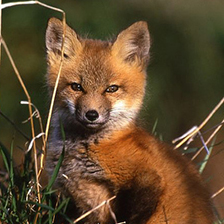

In [5]:
url = "https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [6]:
pixel_values = feature_extractor(image, return_tensors="pt").pixel_values     

In [8]:
pixel_values.shape

torch.Size([1, 3, 224, 224])

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

imagenet_mean = np.array(feature_extractor.image_mean)
imagenet_std = np.array(feature_extractor.image_std)

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

def visualize(pixel_values, model):
    # forward pass
    outputs = model(pixel_values)
    y = model.unpatchify(outputs.logits)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()
    
    # visualize the mask
    mask = outputs.mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.config.patch_size**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', pixel_values)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()

Downloading:   0%|          | 0.00/676 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/448M [00:00<?, ?B/s]

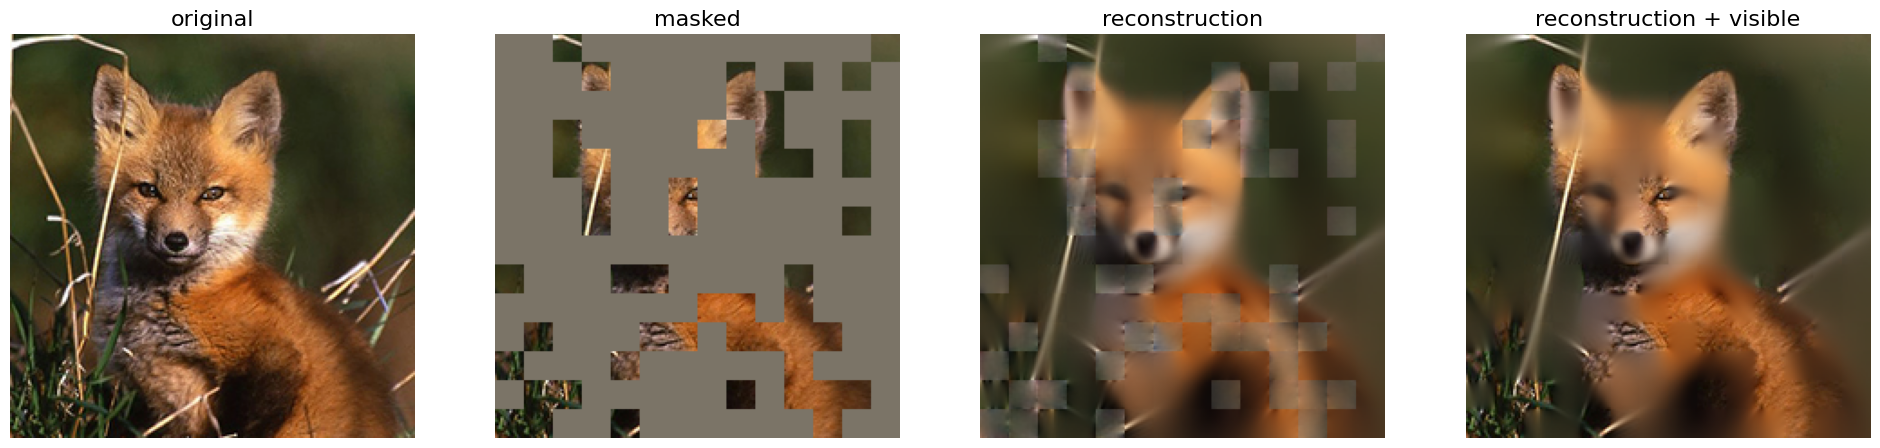

In [10]:
from transformers import ViTMAEForPreTraining

# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)

model = ViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")

visualize(pixel_values, model)

In [15]:
image_2 = Image.open('/mnt/workspace/PadChest/images-small/100014625199913409730274754282179594842_0jycky.png')
image_2 = image_2.point(lambda x: x * 255 / 65535).convert('RGB')
pixel_values_2 = feature_extractor(image_2, return_tensors="pt").pixel_values

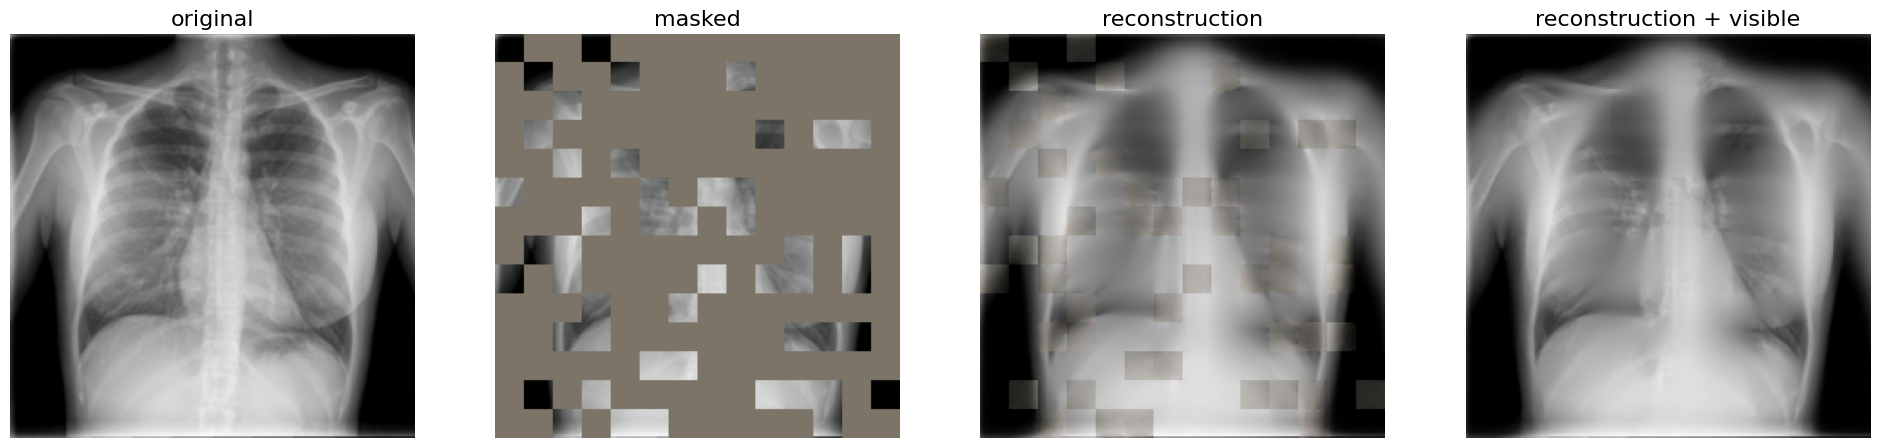

In [25]:
visualize(pixel_values_2, model)

In [21]:
from transformers import ViTMAEForPreTraining

In [22]:
model = ViTMAEForPreTraining.from_pretrained('facebook/vit-mae-base')

In [23]:
outputs = model(pixel_values_2)

In [30]:
outputs

ViTMAEForPreTrainingOutput(loss=tensor(0.0672, grad_fn=<DivBackward0>), logits=tensor([[[ 0.3825,  0.3699,  0.3696,  ..., -1.6442, -1.5367, -1.3207],
         [-0.3313, -0.3582, -0.2514,  ..., -1.5633, -1.4636, -1.2135],
         [-1.3644, -1.2775, -1.0751,  ..., -2.1180, -2.0399, -1.7999],
         ...,
         [ 0.9634,  1.1015,  1.3102,  ..., -1.5989, -1.5140, -1.2623],
         [-1.4113, -1.3154, -1.0794,  ..., -1.7007, -1.6157, -1.3120],
         [-1.5598, -1.4842, -1.3204,  ..., -0.8837, -0.8557, -0.6076]]],
       grad_fn=<SliceBackward0>), mask=tensor([[0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
         1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 1., 1., 1., 1., 0., 1.